# Description of Dataset

WISDM Smartphone and Smartwatch Activity and Biometrics Dataset Data Set

•	Where did you obtain it?

From the Center for Machine Learning and Intelligent Systems of UCI (University of California Irvin). The source of the dataset is from Dr. Gary Weiss, gaweiss '@' fordham.edu, Computer and Information Sciences Department, Fordham University. The dataset is cited as: "Smartphone and Smartwatch-Based Biometrics Using Activities of Daily Living. IEEE Access, 7:133190-133202, Sept. 2019."

•	Where can we obtain it?

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00507/

•	What is the license of the dataset? What are we allowed to do with it?

The dataset is open to public and is available from the UCI Machine Learning Repository. It was donated on 2019-10-06. Although this data can most naturally be used for activity recognition, it can also be used to build behavioral biometric models since each sensor reading is associated with a specific subject. The data set has currently been used in two published studies, both conducted by the author's WISDM Lab. One of these studies is a biometrics study, and the other is an activity recognition study. We are allowed to download and explore the data freely as long as cite appropriately.

•	How big is it in file size and in items

File size: 295MB in zip file, 952MB in csv file (it has undergone basic preprocessing, by merging matched "participant+activity+timecode" between sensors.) Items: number of instances:15630426 in total.

In [136]:
# I added interact and bqplot for interactions
%matplotlib widget
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact
import traitlets

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import bqplot

# Thanks to `ImportanceOfBeingErnest` from https://stackoverflow.com/questions/47404653/pandas-0-21-0-timestamp-compatibility-issue-with-matplotlib
pd.plotting.register_matplotlib_converters()

In [137]:
def get_by_subject_id(subject_id):
    subject_id = str(subject_id) # force into a string
    return {
        'phone': pd.read_csv('phone/{}_phone.csv'.format(subject_id)).drop(columns=['timestamp']),#, parse_dates=['timestamp']) The time isn't really needed and adds a lot of loading time
        'watch': pd.read_csv('watch/{}_watch.csv'.format(subject_id)).drop(columns=['timestamp'])#, parse_dates=['timestamp'])
    }

# The entire merged dataset

In [138]:
df=pd.read_csv('wisdm_all.csv')

C:\Users\aniru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
df.head()

Unnamed: 0  subject_id activity_code        timestamp  phone_accel_x  \
0           0        1600             A  252207666810782      -0.364761   
1           1        1600             A  252207717164786      -0.879730   
2           2        1600             A  252207767518790       2.001495   
3           3        1600             A  252207817872794       0.450623   
4           4        1600             A  252207868226798      -2.164352   

   phone_accel_y phone_accel_z  phone_gyro_x  phone_gyro_y phone_gyro_z  \
0       8.793503    1.0550842;           NaN           NaN          NaN   
1       9.768784    1.0169983;           NaN           NaN          NaN   
2      11.109070     2.619156;           NaN           NaN          NaN   
3      12.651642   0.18455505;           NaN           NaN          NaN   
4      13.928436   -4.4224854;           NaN           NaN          NaN   

   watch_accel_x  watch_accel_y watch_accel_z  watch_gyro_x  watch_gyro_y  \
0            NaN            NaN           NaN           NaN           NaN   
1            NaN            NaN           NaN           NaN           NaN   
2            NaN            NaN           NaN           NaN           NaN   
3            NaN            NaN           NaN           NaN           NaN   
4            NaN            NaN           NaN           NaN           NaN   

  watch_gyro_z  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [140]:
len(df)

9854871

# Checking the features statistically

In [141]:
df.describe()

Unnamed: 0    subject_id     timestamp  phone_accel_x  phone_accel_y  \
count  9.854871e+06  9.854871e+06  9.854871e+06   4.925733e+06   4.925733e+06   
mean   4.927435e+06  1.627877e+03  6.119049e+14   1.147575e-01  -1.531123e+00   
std    2.844856e+06  1.449884e+01  5.884141e+14   5.826543e+00   6.922207e+00   
min    0.000000e+00  1.600000e+03  2.681027e+11  -7.847761e+01  -7.847761e+01   
25%    2.463718e+06  1.616000e+03  1.253211e+14  -4.040497e+00  -7.204752e+00   
50%    4.927435e+06  1.629000e+03  4.416049e+14   2.155518e-02  -1.863325e+00   
75%    7.391152e+06  1.641000e+03  1.129585e+15   4.412003e+00   3.039280e+00   
max    9.854870e+06  1.650000e+03  2.724599e+15   7.847761e+01   6.441166e+01   

       phone_gyro_x  phone_gyro_y  watch_accel_x  watch_accel_y  watch_gyro_x  \
count  3.729965e+06  3.729965e+06   3.906784e+06   3.906784e+06  3.570080e+06   
mean  -4.176968e-03 -4.594604e-03   4.182724e-01  -4.536764e+00 -2.764198e-02   
std    8.333009e-01  9.433161e-01   6.963798e+00   5.314954e+00  1.562007e+00   
min   -2.477092e+01 -3.497829e+01  -7.063152e+01  -7.847761e+01 -3.491730e+01   
25%   -3.515373e-02 -3.723145e-02  -4.823718e+00  -8.106467e+00 -3.120506e-01   
50%   -9.002685e-04 -6.256104e-04  -4.183868e-01  -4.629573e+00  3.994742e-04   
75%    2.993774e-02  3.601074e-02   5.760300e+00  -1.644966e+00  2.901264e-01   
max    2.352948e+01  3.162320e+01   5.211323e+01   3.560197e+01  3.490542e+01   

       watch_gyro_y  
count  3.570080e+06  
mean  -2.923520e-02  
std    1.488754e+00  
min   -3.490016e+01  
25%   -1.818125e-01  
50%    8.759137e-04  
75%    2.022448e-01  
max    3.406907e+01

# Summary of the Dataset features

•What does it represent?

The dataset represents the data of a raw accelerometer a gyroscope sensor data collected from the smartphone and smartwatch at a rate of 20Hz. It is collected from test subject who conducts 18 activities for 3 minutes apiece. The sensor data for each device (phone, watch) and type of sensor (accelerometer, gyroscope) is stored in a different directory (so there are 4 data directories).

•What are the fields/columns/rows?

Fields: Value of each piece of data in different categories

Columns: subject-id: value from 1600- 1650 that identifies one of the 51 test subjects activity-code: character between 'A' and 'S' (no 'N') that identifies the activity, walking = A jogging = B stairs = C sitting = D standing = E typing = F teeth = G soup = H chips = I pasta = J drinking = K sandwich = L kicking = M catch = O dribbling = P writing = Q clapping = R folding = S timestamp: Unix time (integer) x: represents the sensor reading (accelerometer or gyroscope, phone or watch) for the x dimension y: represents the sensor reading (accelerometer or gyroscope, phone or watch) for the y dimension z: represents the sensor reading (accelerometer or gyroscope, phone or watch) for the z dimension

Rows: id of each piece of data

•What data types are they?

Unnamed: 0 int64 subject_id int64 activity_code object timestamp int64 phone_accel_x float64 phone_accel_y float64 phone_accel_z float64 phone_gyro_x float64 phone_gyro_y float64 phone_gyro_z float64 watch_accel_x float64 watch_accel_y float64 watch_accel_z float64 watch_gyro_x float64 watch_gyro_y float64 watch_gyro_z float64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9854871 entries, 0 to 9854870
Data columns (total 16 columns):
Unnamed: 0       int64
subject_id       int64
activity_code    object
timestamp        int64
phone_accel_x    float64
phone_accel_y    float64
phone_accel_z    object
phone_gyro_x     float64
phone_gyro_y     float64
phone_gyro_z     object
watch_accel_x    float64
watch_accel_y    float64
watch_accel_z    object
watch_gyro_x     float64
watch_gyro_y     float64
watch_gyro_z     object
dtypes: float64(8), int64(3), object(5)
memory usage: 1.2+ GB


In [143]:
phone_a_1600_df = get_by_subject_id('1600').get('phone')

In [144]:
phone_a_1600_df.head()

subject_id activity_code   x_accel    y_accel   z_accel    x_gyro  \
0        1600             A -4.332779  13.361191 -0.718872 -0.853210   
1        1600             A -0.319443  13.318359 -0.232025 -0.875137   
2        1600             A  1.566452   9.515274 -0.017776 -0.720169   
3        1600             A -0.323746   5.262665  0.322342 -0.571640   
4        1600             A -1.811676   3.710510  1.373932 -0.380493   

     y_gyro    z_gyro  
0  0.297226  0.890183  
1  0.015472  0.162231  
2  0.388489 -0.284012  
3  1.227402 -0.241669  
4  1.202835 -0.213135

In [145]:
phone_a_1600_df_walking=phone_a_1600_df[phone_a_1600_df['activity_code']=='A']

In [146]:
phone_a_1600_df_walking

subject_id activity_code   x_accel    y_accel   z_accel    x_gyro  \
0           1600             A -4.332779  13.361191 -0.718872 -0.853210   
1           1600             A -0.319443  13.318359 -0.232025 -0.875137   
2           1600             A  1.566452   9.515274 -0.017776 -0.720169   
3           1600             A -0.323746   5.262665  0.322342 -0.571640   
4           1600             A -1.811676   3.710510  1.373932 -0.380493   
5           1600             A -1.134049   4.538269  2.297546 -0.225784   
6           1600             A  0.092911   6.706101  1.899628  0.127808   
7           1600             A -1.036316  15.611984  2.641525 -0.513504   
8           1600             A  0.752304   9.682709  3.000870  0.446365   
9           1600             A -0.496979  18.676529  0.937378 -1.356628   
10          1600             A -2.359375  10.250824 -1.750854  0.012772   
11          1600             A  0.580170   7.587814  0.443924  0.577637   
12          1600             A -2.812180   9.138001 -0.450439  1.120346   
13          1600             A -1.885391   8.086990  0.847443  0.887726   
14          1600             A  0.889343   4.531982 -0.228958  0.910889   
15          1600             A  0.004822   7.217438  0.347122  0.844391   
16          1600             A -0.401566   8.818573  0.580536  0.295654   
17          1600             A -1.371719  11.805405  2.585327  0.120453   
18          1600             A  3.651398  10.278336  3.745331  0.381226   
19          1600             A  1.651108  13.003159 -2.630463  1.082046   
20          1600             A -6.492264  15.142807 -4.196732  0.226730   
21          1600             A -2.365341  14.497086 -0.509064 -0.774231   
22          1600             A  0.568207  10.774796 -1.624374 -1.091019   
23          1600             A  0.140884   6.327484 -0.589020 -0.721283   
24          1600             A -2.257034   2.684174 -0.441772 -0.485886   
25          1600             A -2.590195   3.723801  1.422150 -0.487885   
26          1600             A -0.140533   5.542450  2.450531 -0.640808   
27          1600             A -0.093048  11.105392  1.925980 -0.565445   
28          1600             A -3.081680  17.960250  6.472199 -0.249771   
29          1600             A  0.500580  16.245224 -1.838470 -0.970657   
...          ...           ...       ...        ...       ...       ...   
3539        1600             A -2.496201   4.386002  2.017517 -0.367203   
3540        1600             A -1.496323   7.271118  2.090973 -0.452515   
3541        1600             A -3.186173  12.805618  3.682938 -0.005203   
3542        1600             A -2.953659  14.839005  1.849396 -0.407104   
3543        1600             A -3.589691  10.352905  1.541656 -0.448074   
3544        1600             A -3.585892   8.429398  2.496017 -0.329620   
3545        1600             A -2.181290   8.604889 -0.777512  0.533005   
3546        1600             A -4.984726   9.582901 -1.140976  0.803696   
3547        1600             A -4.102631   8.276321  0.764084  0.806152   
3548        1600             A -0.960342   5.679153 -0.045074  0.929764   
3549        1600             A -1.121139   7.097641 -0.109741  0.956207   
3550        1600             A -0.751770   8.080597  0.555847  0.783615   
3551        1600             A -1.566376   9.158890  0.698257  0.421173   
3552        1600             A -0.432343  11.045120  1.373673  0.156372   
3553        1600             A -1.184906  11.724792  0.740326  0.438858   
3554        1600             A -4.474136  13.376389 -4.161789  0.193878   
3555        1600             A -7.063553  12.457626 -3.248108 -0.880371   
3556        1600             A -0.844696  13.045441 -0.209183 -1.315155   
3557        1600             A  0.138031  12.162277  0.305023 -1.393829   
3558        1600             A -1.674560   7.054291 -0.154251 -1.093308   
3559        1600             A -2.511688   2.572250  0.359787 -0.856384   
3560        1600             A 

#  Walking for subject id -1600

# Phone Gyroscope pattern for the three axes

In [147]:

fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].scatter(x=phone_a_1600_df_walking['x_gyro'],y=phone_a_1600_df_walking['y_gyro'],color='#bada55')
axes[0].set_title("X axis vs Y axis")

axes[1].scatter(x=phone_a_1600_df_walking['x_gyro'],y=phone_a_1600_df_walking['z_gyro'],color='#f7347a')
axes[1].set_title("X axis vs Z axis")

axes[2].scatter(x=phone_a_1600_df_walking['y_gyro'],y=phone_a_1600_df_walking['z_gyro'],color='#ff0000')
axes[2].set_title("Y axis vs Z axis")




        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Y axis vs Z axis')

# Phone Accelerometer pattern for the three axes

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].scatter(x=phone_a_1600_df_walking['x_accel'],y=phone_a_1600_df_walking['y_accel'],color='#065535')
axes[0].set_title("X axis vs Y axis")

axes[1].scatter(x=phone_a_1600_df_walking['x_accel'],y=phone_a_1600_df_walking['z_accel'],color='#ff80ed')
axes[1].set_title("X axis vs Z axis")

axes[2].scatter(x=phone_a_1600_df_walking['y_accel'],y=phone_a_1600_df_walking['z_accel'],color='#FFF833')
axes[2].set_title("Y axis vs Z axis")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Y axis vs Z axis')

# Watch Gyroscope pattern for the three axes


In [149]:
watch_a_1600_df = get_by_subject_id('1600').get('watch')

In [150]:
watch_a_1600_df_walking.head()

subject_id activity_code   x_accel   y_accel   z_accel    x_gyro    y_gyro  \
0        1600             A  4.972757 -0.158317  6.696732  0.314944 -1.022277   
1        1600             A  3.253720 -0.191835  6.107758  0.387382 -0.618541   
2        1600             A  2.801216 -0.155922  5.997625  0.070999 -0.209480   
3        1600             A  3.770868 -1.051354  7.731027  0.037975  0.254976   
4        1600             A  4.661511  0.169689  9.684695  0.073129  0.719431   

     z_gyro  
0 -0.309962  
1 -0.048972  
2 -0.195978  
3 -0.156563  
4 -0.001035

In [151]:
watch_a_1600_df_walking=watch_a_1600_df[watch_a_1600_df['activity_code']=='A']

In [152]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].scatter(x=watch_a_1600_df_walking['x_gyro'],y=watch_a_1600_df_walking['y_gyro'],color='orange')
axes[0].set_title("X axis vs Y axis")

axes[1].scatter(x=watch_a_1600_df_walking['x_gyro'],y=watch_a_1600_df_walking['z_gyro'],color='green')
axes[1].set_title("X axis vs Z axis")

axes[2].scatter(x=watch_a_1600_df_walking['y_gyro'],y=watch_a_1600_df_walking['z_gyro'],color='blue')
axes[2].set_title("Y axis vs Z axis")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Y axis vs Z axis')

# # Watch accelerometer pattern for the three axes

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].scatter(x=watch_a_1600_df_walking['x_accel'],y=watch_a_1600_df_walking['y_accel'],color='yellow')
axes[0].set_title("X axis vs Y axis")

axes[1].scatter(x=watch_a_1600_df_walking['x_accel'],y=watch_a_1600_df_walking['z_accel'])
axes[1].set_title("X axis vs Z axis")

axes[2].scatter(x=watch_a_1600_df_walking['y_accel'],y=watch_a_1600_df_walking['z_accel'],color='crimson')
axes[2].set_title("Y axis vs Z axis")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Y axis vs Z axis')

#  3-D Phone accelarations plots for the subject 1600 for all activities

#### Restart the kernel at this point as the 3-D visualisations were overlapping with %matplotlib widget

In [134]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import bqplot
%matplotlib inline

Text(0.5, 0.98, 'Subject id-1600 -3D curves of different activities-phone accelaration ')

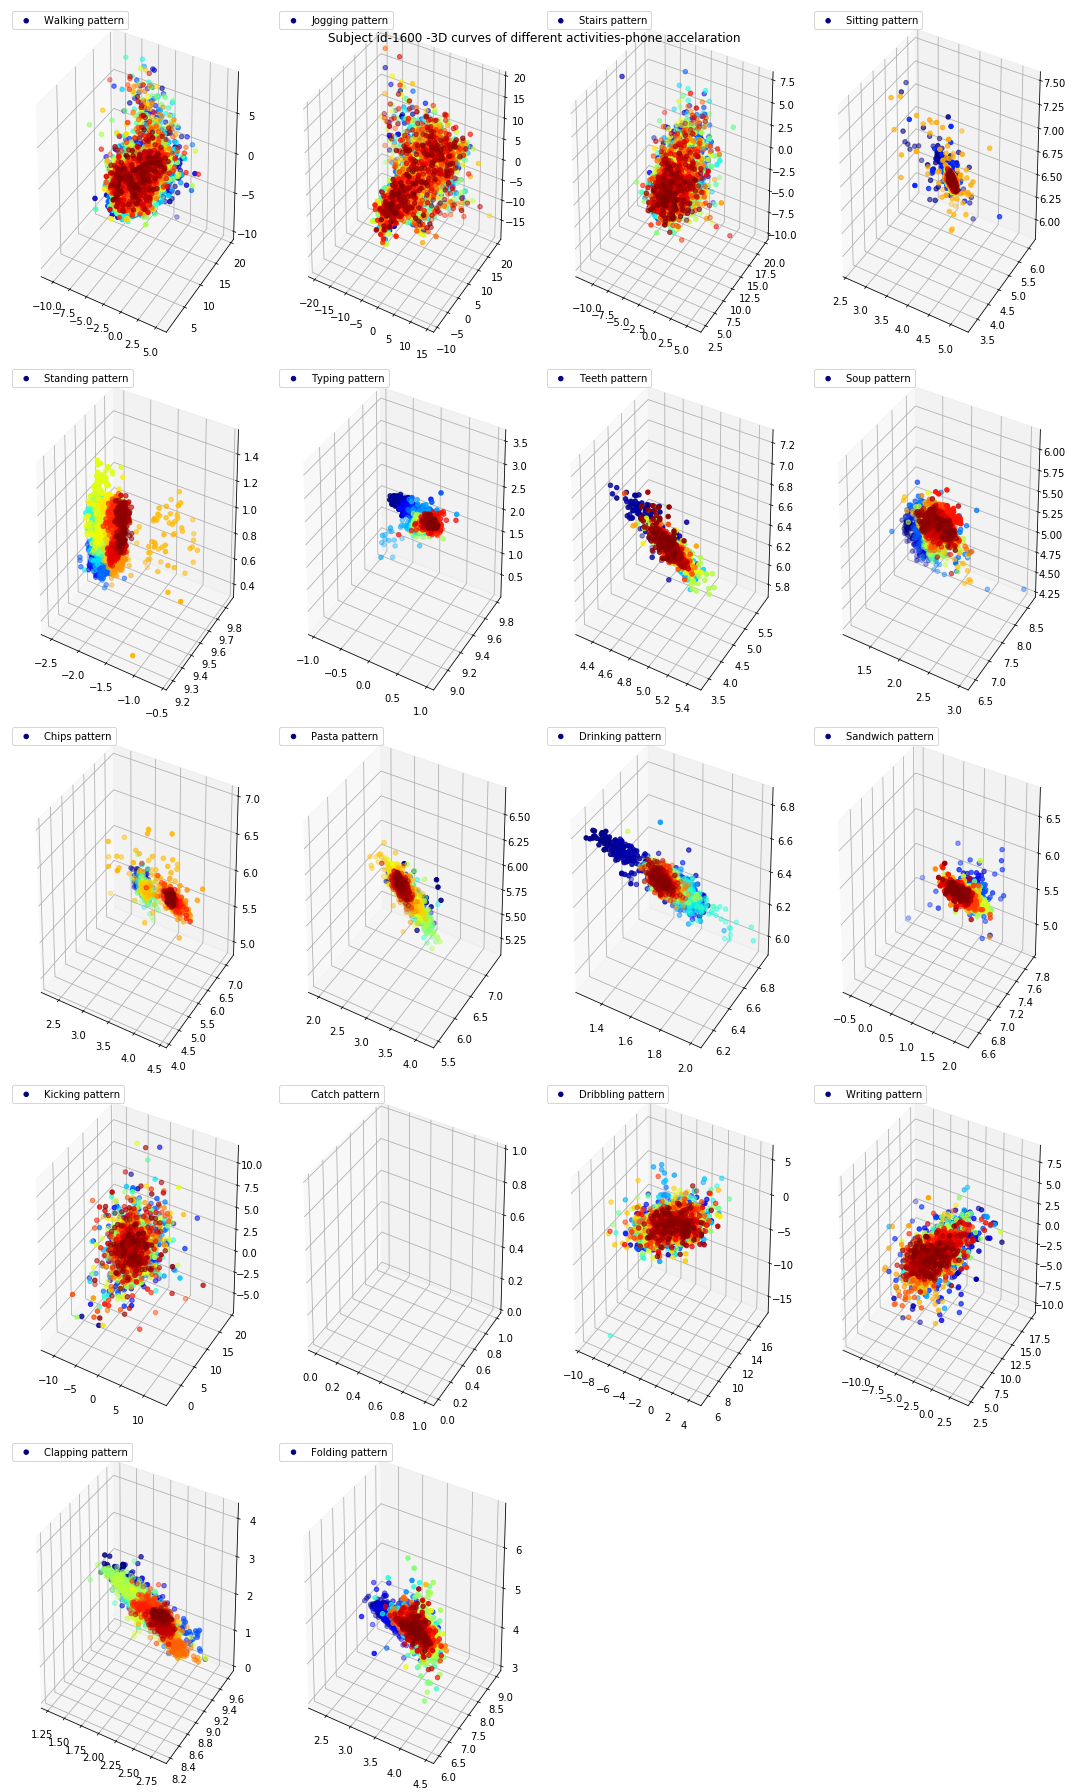

In [135]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
ax = fig.add_subplot(5, 4, 1, projection='3d')

ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["z_accel"],label='Walking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 2, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["z_accel"],label='Jogging pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 3, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["z_accel"],label='Stairs pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 4, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["z_accel"],label='Sitting pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 5, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["z_accel"],label='Standing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 6, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["z_accel"],label='Typing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 7, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["z_accel"],label='Teeth pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 8, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["z_accel"],label='Soup pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 9, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["z_accel"],label='Chips pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 10, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["z_accel"],label='Pasta pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 11, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["z_accel"],label='Drinking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 12, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["z_accel"],label='Sandwich pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 13, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["z_accel"],label='Kicking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 14, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["z_accel"],label='Catch pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 15, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["z_accel"],label='Dribbling pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 16, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["z_accel"],label='Writing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 17, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["z_accel"],label='Clapping pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 18, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["x_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["y_accel"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["z_accel"],label='Folding pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]))))
ax.legend(loc='upper left')
plt.tight_layout()
fig.suptitle('Subject id-1600 -3D curves of different activities-phone accelaration ')

# 3-D Phone gyroscope plots for the subject 1600 for all activities

Text(0.5, 0.98, 'Subject id-1600 -3D curves of different activities-phone gyroscope ')

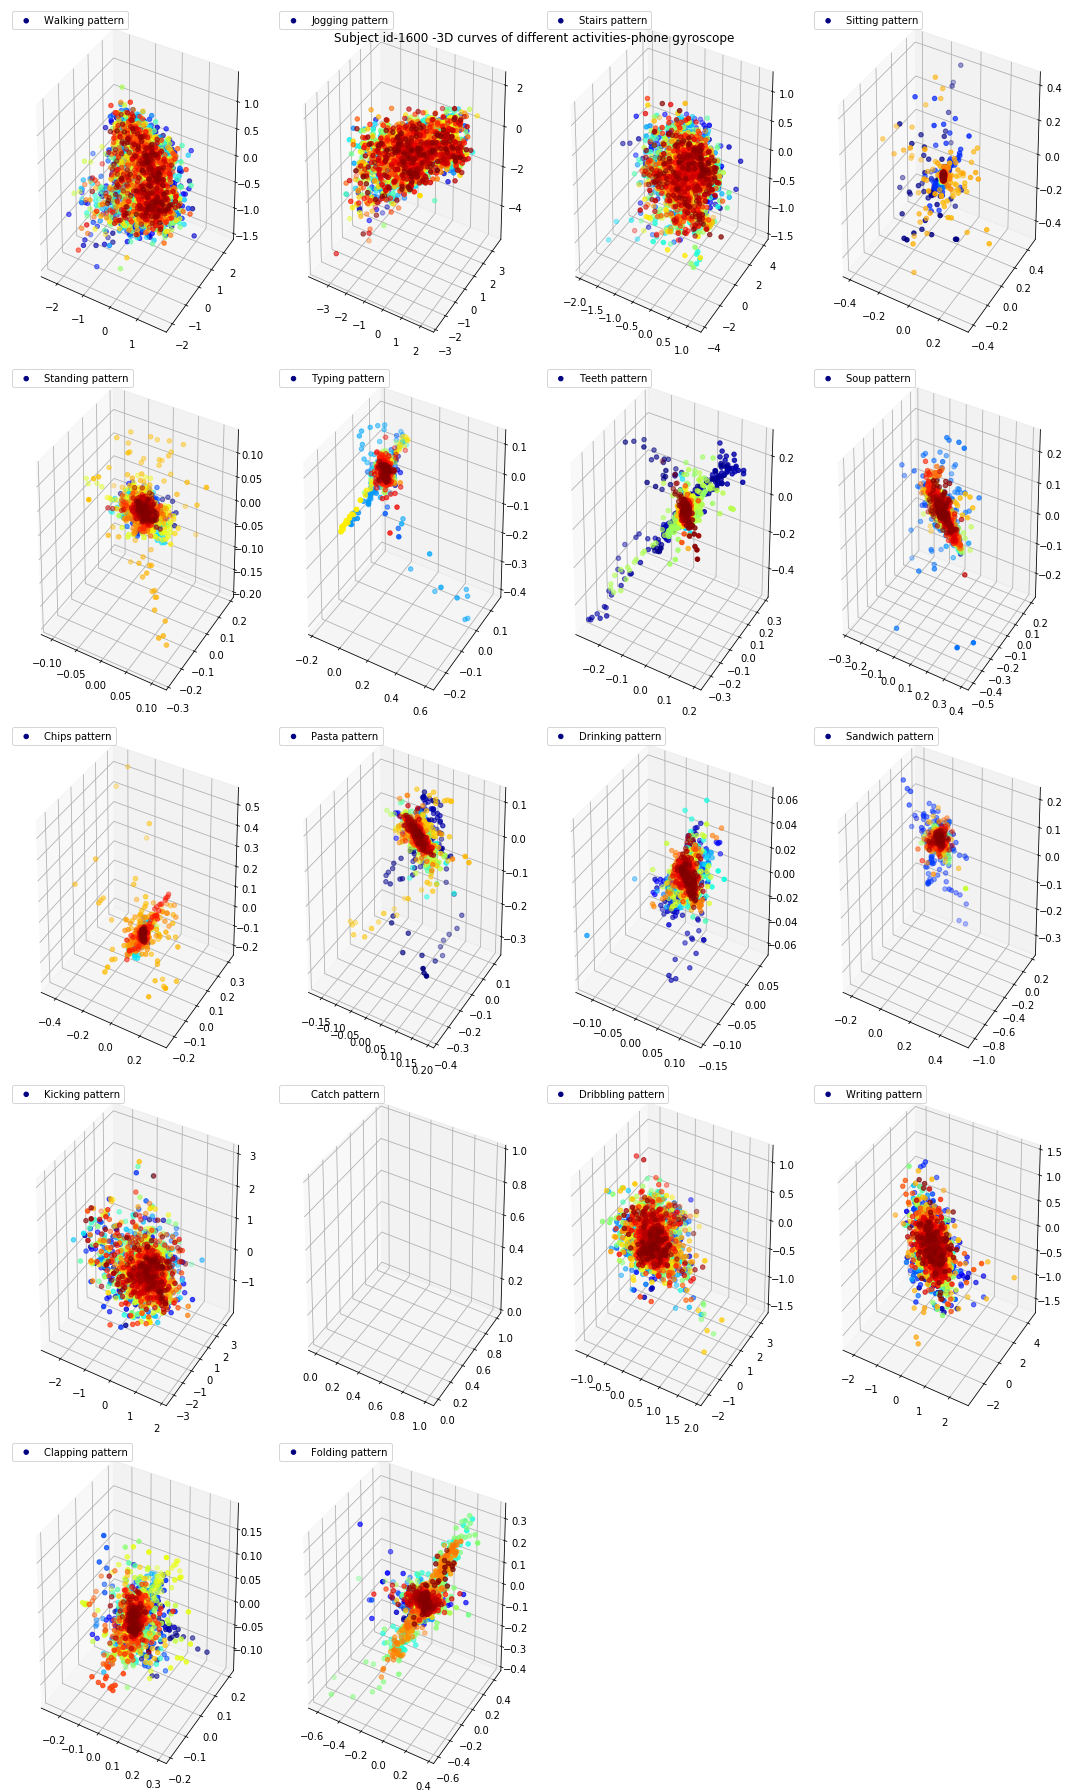

In [113]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
ax = fig.add_subplot(5, 4, 1, projection='3d')

ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]["z_gyro"],label='Walking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="A"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 2, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]["z_gyro"],label='Jogging pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="B"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 3, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]["z_gyro"],label='Stairs pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="C"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 4, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]["z_gyro"],label='Sitting pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="D"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 5, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]["z_gyro"],label='Standing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="E"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 6, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]["z_gyro"],label='Typing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="F"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 7, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]["z_gyro"],label='Teeth pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="G"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 8, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]["z_gyro"],label='Soup pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="H"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 9, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]["z_gyro"],label='Chips pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="I"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 10, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]["z_gyro"],label='Pasta pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="J"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 11, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]["z_gyro"],label='Drinking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="K"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 12, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]["z_gyro"],label='Sandwich pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="L"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 13, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]["z_gyro"],label='Kicking pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="M"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 14, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]["z_gyro"],label='Catch pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="N"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 15, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]["z_gyro"],label='Dribbling pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="O"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 16, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]["z_gyro"],label='Writing pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="P"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 17, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]["z_gyro"],label='Clapping pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="Q"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 18, projection='3d')
ax.scatter(phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["x_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["y_gyro"],phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]["z_gyro"],label='Folding pattern', c = plt.cm.jet(np.linspace(0,1,len(phone_a_1600_df[phone_a_1600_df["activity_code"]=="R"]))))
ax.legend(loc='upper left')
plt.tight_layout()
fig.suptitle('Subject id-1600 -3D curves of different activities-phone gyroscope ')

# 3-D Watch accelarations plots for the subject 1600 for all activities

Text(0.5, 0.98, 'Subject id-1600-3D curves of different activities-watch accelaration ')

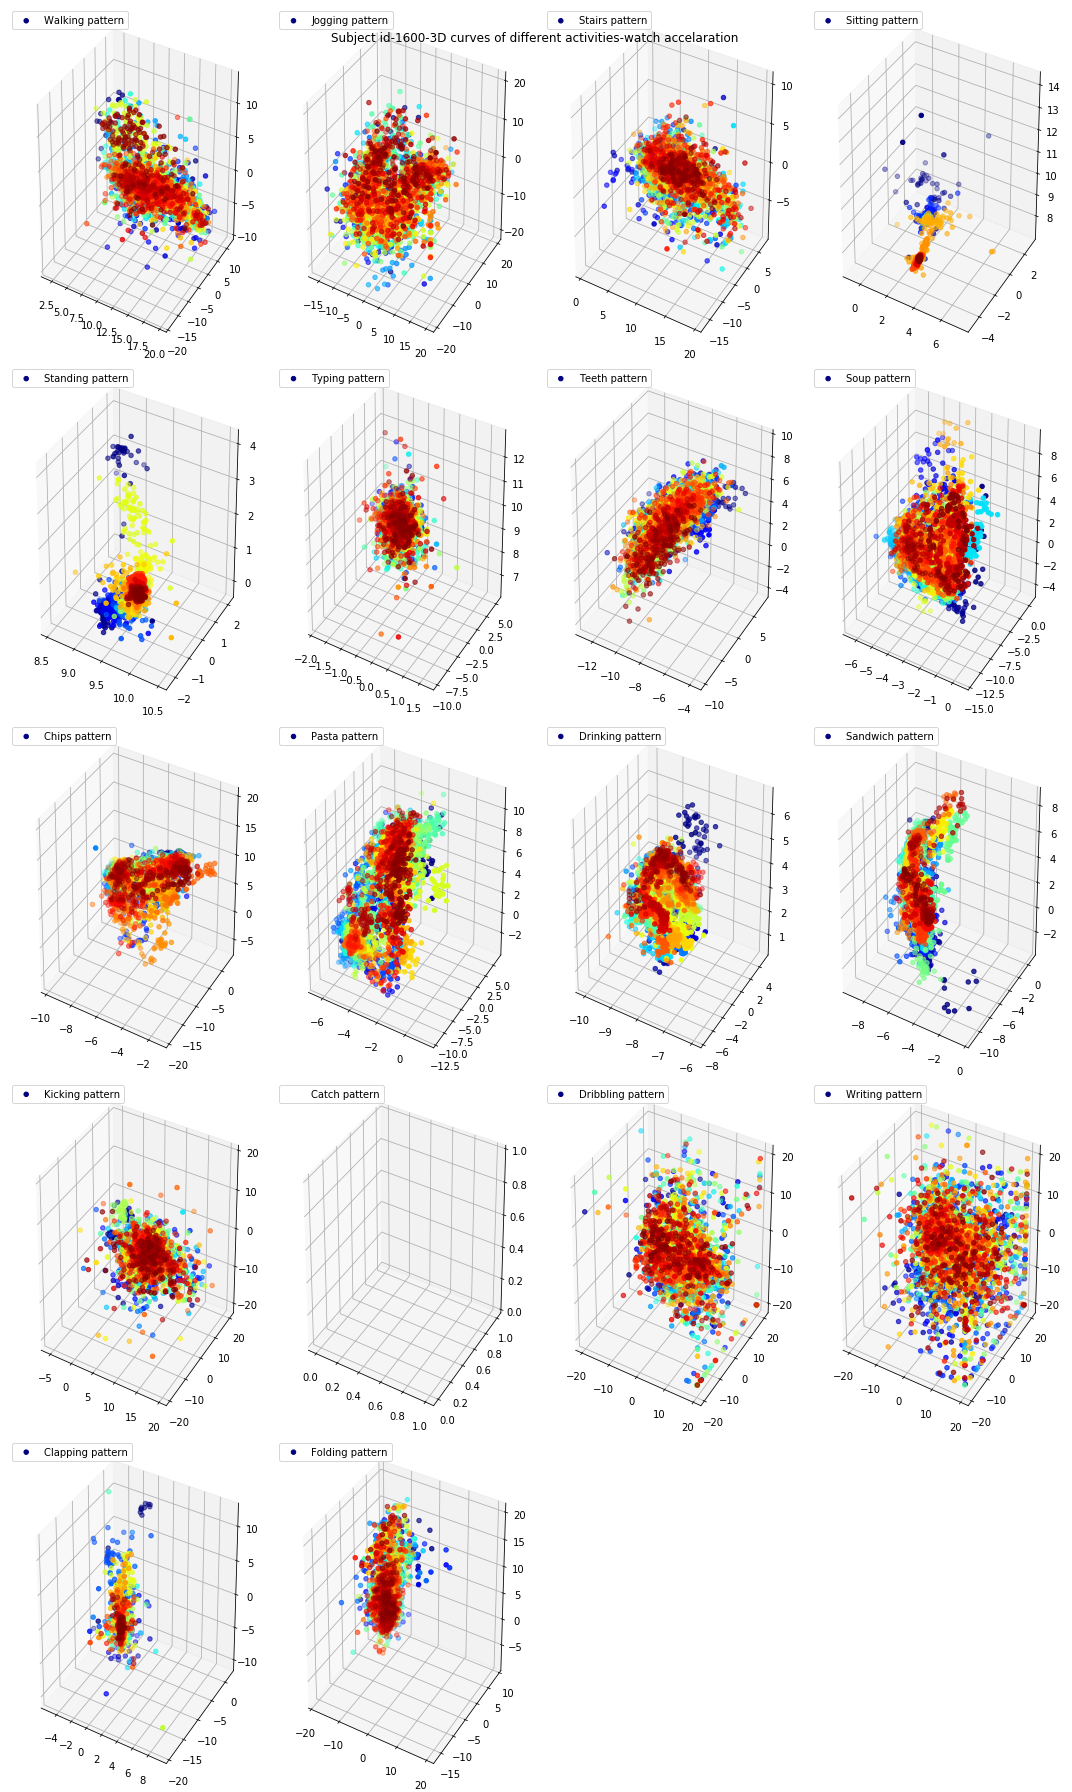

In [114]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
ax = fig.add_subplot(5, 4, 1, projection='3d')

ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["z_accel"],label='Walking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 2, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["z_accel"],label='Jogging pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 3, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["z_accel"],label='Stairs pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 4, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["z_accel"],label='Sitting pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 5, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["z_accel"],label='Standing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 6, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["z_accel"],label='Typing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 7, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["z_accel"],label='Teeth pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 8, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["z_accel"],label='Soup pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 9, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["z_accel"],label='Chips pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 10, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["z_accel"],label='Pasta pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 11, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["z_accel"],label='Drinking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 12, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["z_accel"],label='Sandwich pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 13, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["z_accel"],label='Kicking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 14, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["z_accel"],label='Catch pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 15, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["z_accel"],label='Dribbling pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 16, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["z_accel"],label='Writing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 17, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["z_accel"],label='Clapping pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 18, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["x_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["y_accel"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["z_accel"],label='Folding pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]))))
ax.legend(loc='upper left')
plt.tight_layout()
fig.suptitle('Subject id-1600-3D curves of different activities-watch accelaration ')

# 3-D Watch accelarations plots for the subject 1600 for all activities

Text(0.5, 0.98, 'Subject id-1600-3D curves of different activities-watch gyroscope ')

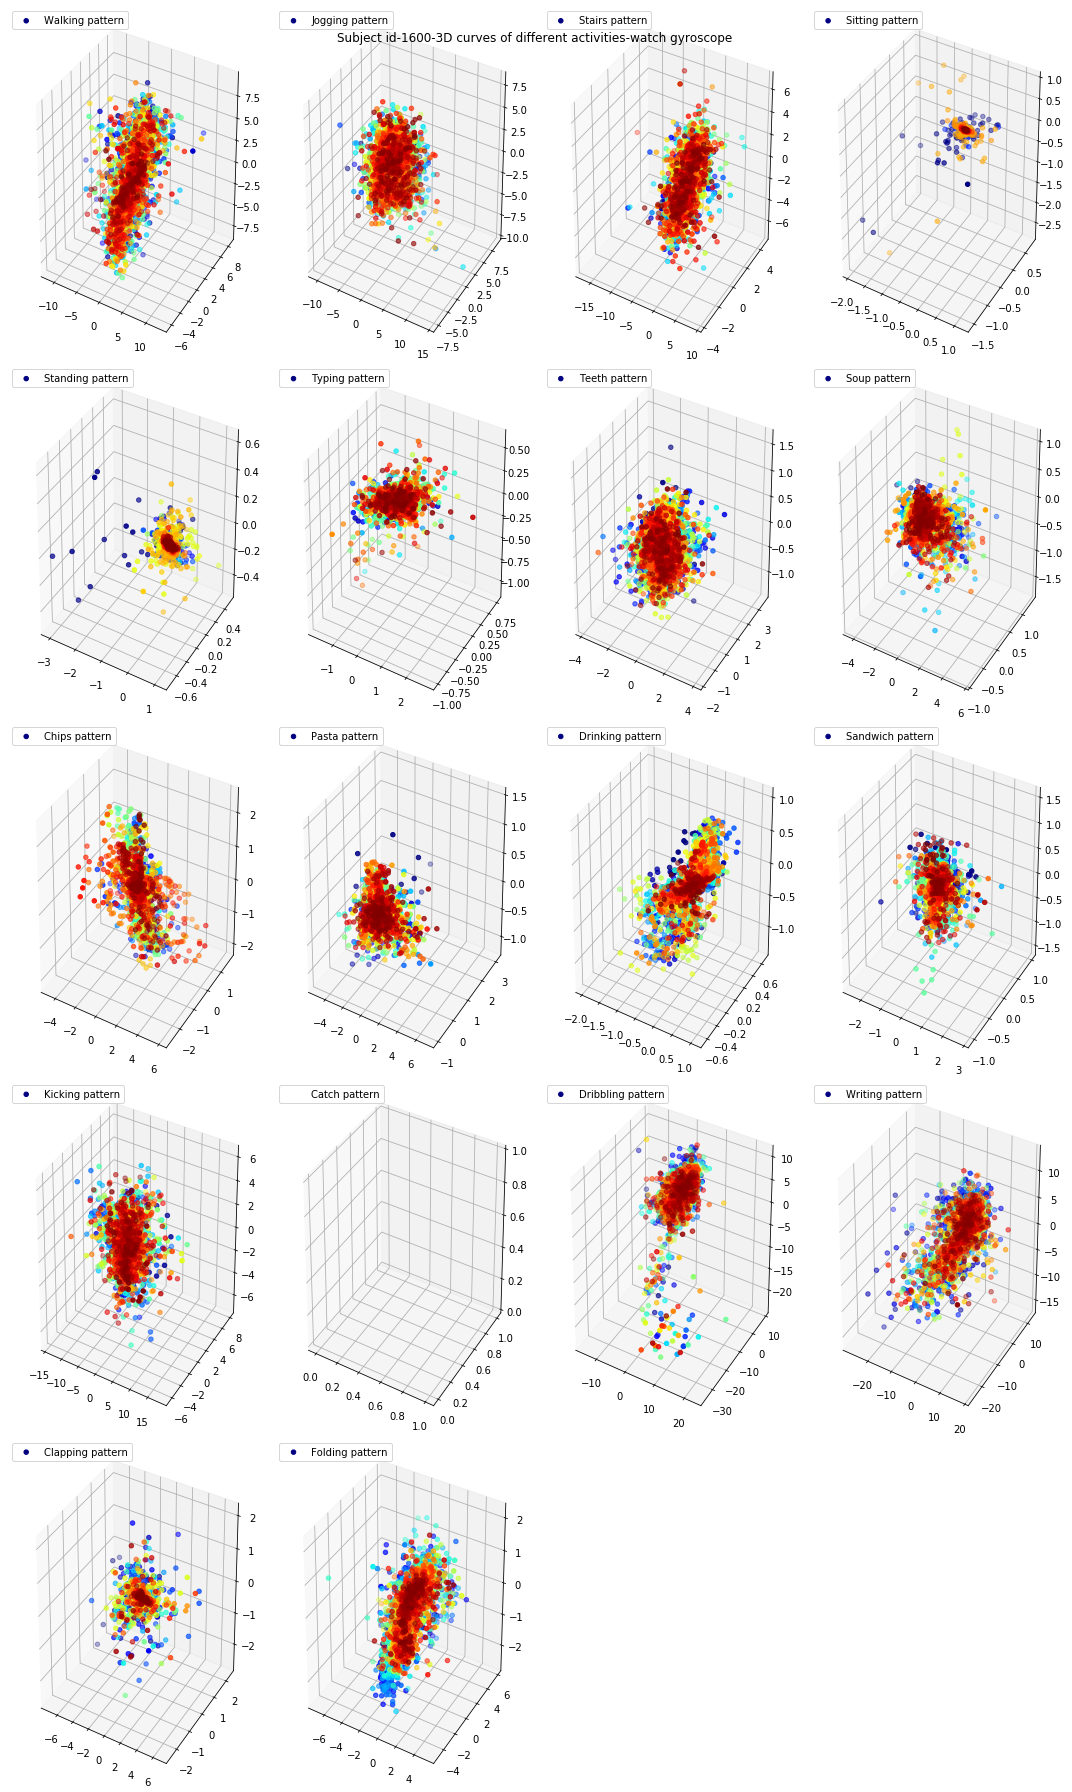

In [115]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
ax = fig.add_subplot(5, 4, 1, projection='3d')

ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]["z_gyro"],label='Walking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="A"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 2, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]["z_gyro"],label='Jogging pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="B"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 3, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]["z_gyro"],label='Stairs pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="C"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 4, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]["z_gyro"],label='Sitting pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="D"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 5, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]["z_gyro"],label='Standing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="E"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 6, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]["z_gyro"],label='Typing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="F"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 7, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]["z_gyro"],label='Teeth pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="G"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 8, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]["z_gyro"],label='Soup pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="H"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 9, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]["z_gyro"],label='Chips pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="I"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 10, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]["z_gyro"],label='Pasta pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="J"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 11, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]["z_gyro"],label='Drinking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="K"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 12, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]["z_gyro"],label='Sandwich pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="L"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 13, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]["z_gyro"],label='Kicking pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="M"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 14, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]["z_gyro"],label='Catch pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="N"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 15, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]["z_gyro"],label='Dribbling pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="O"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 16, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]["z_gyro"],label='Writing pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="P"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 17, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]["z_gyro"],label='Clapping pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="Q"]))))
ax.legend(loc='upper left')
ax = fig.add_subplot(5, 4, 18, projection='3d')
ax.scatter(watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["x_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["y_gyro"],watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]["z_gyro"],label='Folding pattern', c = plt.cm.jet(np.linspace(0,1,len(watch_a_1600_df[watch_a_1600_df["activity_code"]=="R"]))))
ax.legend(loc='upper left')
plt.tight_layout()
fig.suptitle('Subject id-1600-3D curves of different activities-watch gyroscope ')

# 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Y axis vs Z axis')